In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [99]:
df = pd.read_excel('cleaned_dataset.xlsx')
df.head()

,Carimbo de data/hora,id_integer,role,years_exp,org_size,org_field,agile_methods,use_metrics_planning,use_metrics_review,use_metrics_weekly,...,metric_9,metric_10,metric_11,metric_12,metric_13,metric_14,metric_15,metric_16,metric_17,metric_18
0,17:34:49,1,Product manager,0 a 5,Microempresa,energia,"Scrum, Kanban",Métricas,NaN,Métricas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17:57:23,2,Desenvolvedor(a),0 a 5,Microempresa,Financeiro,"Scrum, Kanban",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20:50:58,3,Product manager,0 a 5,Pequena empresa,Eventos,Scrum,NaN,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22:26:06,4,Team leader,6 a 9,Microempresa,gestão,"Scrum, Kanban",Métricas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19:07:11,5,Product manager,0 a 5,Pequena empresa,Agronegocio,"Scrum, Kanban",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Converter a string em uma lista de métricas
metrics = df['sanitized_metrics'].str.split(', ', expand=True)

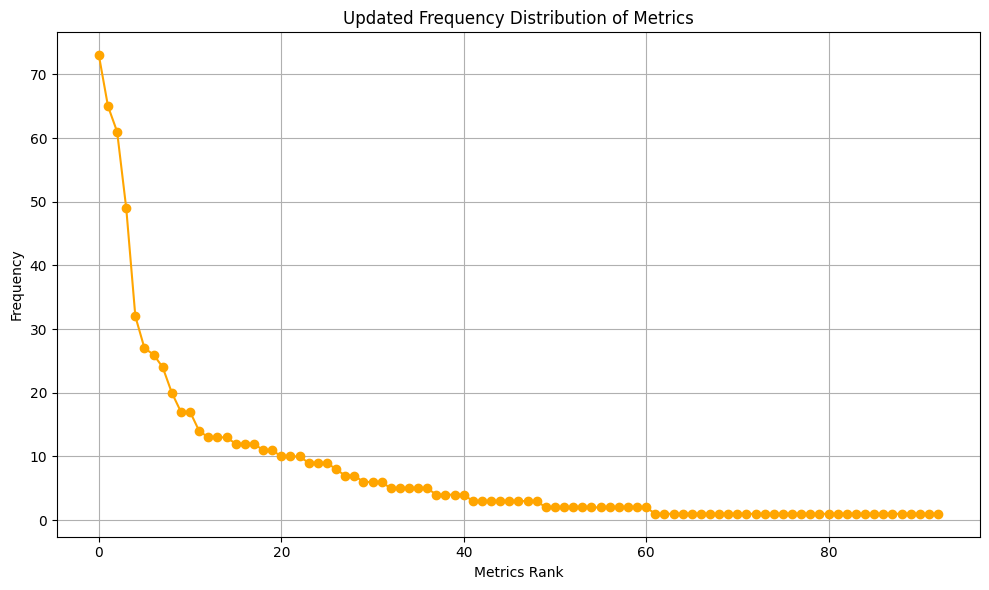

In [101]:
# Contar a frequência de cada métrica
metric_counts = metrics.stack().value_counts()

# Plotar o gráfico de frequência das métricas
plt.figure(figsize=(10, 6))
plt.plot(metric_counts.sort_values(ascending=False).values, marker='o', color='orange')
plt.xlabel('Metrics Rank')
plt.ylabel('Frequency')
plt.title('Updated Frequency Distribution of Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [102]:
# --------------------- Remoção por Frequencia ---------------------

# Definindo o limite de frequencia para identificar outliers
low_frequency_threshold = 5  

# Identificar métricas que são consideradas outliers com base na baixa frequencia
low_frequency_outliers = metric_counts[metric_counts <= low_frequency_threshold].index

low_frequency_outliers

Index(['Delivery to customer', 'Clima', 'Horas extras',
       'Cumulative Flow Diagrams', 'Produto', 'Apdex', 'Turnover',
       'Contact Rate', 'Funil', 'Delivery on time',
       'Disponibilidade do produto', 'Tempo melhorias', 'WIP', 'Aquisição',
       'DORA Metrics', 'Quantidade de alertas', 'Bugs density',
       'Planned hours', 'Time to recover', 'Cultura Organizacional', 'EBTDA',
       'Evolução de Produto', 'Tempo médio de recuperação', 'Metricas de uso',
       'BPS', 'Indicator about risky user stories', 'RAID',
       'Number of deployments', 'Backlog',
       'Quantidade de solicitações de clientes', 'Commit Review Performance',
       'Change failure rate', 'Role Time Measure', 'Pulse', 'Burn-up',
       'BoardColumn', 'Evolução (Cognitiva-Científica',
       'Effort estimation accuracy', 'Running Tested Features Metric',
       'Hours spent on bugs', 'Leads', 'Queue impediments size', 'Faturamento',
       'Taxas de exceções', 'CES', 'Transações', 'EAC',
       'Rejec

In [103]:
# Verifique se todos os valores na coluna 'sanitized_metrics' são strings
df['sanitized_metrics'] = df['sanitized_metrics'].astype(str)

# Remover métricas outliers de sanitized_metrics
df['sanitized_metrics'] = df['sanitized_metrics'].apply(
    lambda x: ', '.join([metric for metric in x.split(', ') if metric not in low_frequency_outliers])
)

# Verificar os valores atualizados
df['sanitized_metrics'].head()

0                                  Ideal team capacity
1    NPS, Burndown, Outstanding bugs, Throughput, N...
2                              Burndown, OKR, Velocity
3                 CAC, Throughput, Roadmaps, Conversão
4                               User Story Points, NPS
Name: sanitized_metrics, dtype: object

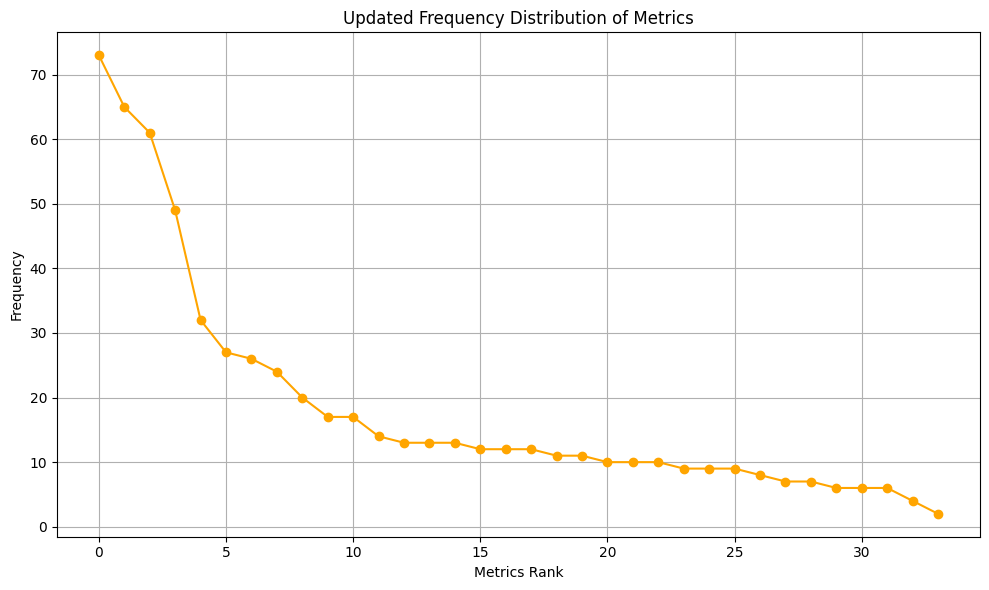

In [104]:
# Converter a string em uma lista de métricas
metrics = df['sanitized_metrics'].str.split(', ', expand=True)
metric_counts = metrics.stack().value_counts()

# Plotar o gráfico de frequência das métricas
plt.figure(figsize=(10, 6))
plt.plot(metric_counts.sort_values(ascending=False).values, marker='o', color='orange')
plt.xlabel('Metrics Rank')
plt.ylabel('Frequency')
plt.title('Updated Frequency Distribution of Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
df['agile_methods'] = df['agile_methods'].fillna('')

In [106]:
df['agile_methods_split'] = df['agile_methods'].apply(lambda x: x.split(', '))

In [107]:
# Explorar os métodos ágeis únicos no dataset
unique_methods = set()
df['agile_methods_split'].apply(unique_methods.update)

0      None
1      None
2      None
3      None
4      None
       ... 
205    None
206    None
207    None
208    None
209    None
Name: agile_methods_split, Length: 210, dtype: object

In [108]:
from collections import Counter


In [109]:
# Contar a frequência de cada método ágil
all_methods = [method for methods in df['agile_methods_split'] for method in methods]
methods_counter = Counter(all_methods)

# Criar um DataFrame a partir do contador de métodos
methods_freq_df = pd.DataFrame(methods_counter.items(), columns=['Method', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Mostrar as 5 primeiras linhas
methods_freq_df.head()

,Method,Frequency
0,Scrum,172
1,Kanban,154
4,ScrumBan,80
2,Lean,62
5,XP,25


In [110]:
methods_freq_sorted = methods_freq_df.sort_values(by='Frequency', ascending=False)

# Extrair os valores para o eixo x (métodos) e y (frequência)
methods = methods_freq_sorted['Method']
frequencies = methods_freq_sorted['Frequency']

In [111]:
# Identificar os métodos ágeis cuja frequência é menor que 2
outliers = methods_freq_df[methods_freq_df['Frequency'] < 2]

# Mostrar os métodos identificados como outliers
print("Métodos Ágeis Identificados como Outliers (Frequência < 2):")
print(outliers)

Métodos Ágeis Identificados como Outliers (Frequência < 2):
                                               Method  Frequency
6                                      Lean Inception          1
7   iniciando praticas no AUF (Agile Upstream Fram...          1
8                                            Híbrido           1
9       Adaptação de Kanban e Scrum a nossa realidade          1
10                                   Fluxo unificado           1
11  Optamos por não adotar um framework e adequar ...          1
12                                    Tradicional/PMI          1
13                                               etc.          1


In [112]:
# Obter os métodos considerados outliers
outliers_methods = set(outliers['Method'])

# Remover os métodos ágeis que são outliers da coluna 'agile_methods_split'
df['agile_methods'] = df['agile_methods_split'].apply(lambda x: [method for method in x if method not in outliers_methods])


In [113]:
df.to_excel('updated_dataset.xlsx', index=False)

In [114]:
df.head()

,Carimbo de data/hora,id_integer,role,years_exp,org_size,org_field,agile_methods,use_metrics_planning,use_metrics_review,use_metrics_weekly,...,metric_10,metric_11,metric_12,metric_13,metric_14,metric_15,metric_16,metric_17,metric_18,agile_methods_split
0,17:34:49,1,Product manager,0 a 5,Microempresa,energia,"[Scrum, Kanban]",Métricas,NaN,Métricas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Scrum, Kanban]"
1,17:57:23,2,Desenvolvedor(a),0 a 5,Microempresa,Financeiro,"[Scrum, Kanban]",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Scrum, Kanban]"
2,20:50:58,3,Product manager,0 a 5,Pequena empresa,Eventos,[Scrum],NaN,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Scrum]
3,22:26:06,4,Team leader,6 a 9,Microempresa,gestão,"[Scrum, Kanban]",Métricas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Scrum, Kanban]"
4,19:07:11,5,Product manager,0 a 5,Pequena empresa,Agronegocio,"[Scrum, Kanban]",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Scrum, Kanban]"
